# 📊 Telco Customer Data Cleaning Project

## 📌 Background
Dataset ini berisi informasi pelanggan dari sebuah perusahaan telekomunikasi.
Sebelum melakukan analisis lebih lanjut seperti prediksi pelanggan yang akan berhenti berlangganan atau segmentasi pelanggan,
kualitas data harus dinilai dan ditingkatkan.

## 🎯 Objective
The objective of this project is to:
- Identify missing values
- Detect and handle duplicates
- Check data type inconsistencies
- Identify potential outliers
- Prepare a clean dataset for further analysis

## 🛠 Tools Used
- Python
- Pandas
- NumPy
- Matplotlib / Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 📊 Gambaran Umum Data

Pada tahap ini dilakukan pemeriksaan awal terhadap dataset untuk memahami:
- Jumlah baris dan kolom
- Tipe data setiap variabel
- Statistik deskriptif awal

In [ ]:
df_telco = pd.read_csv('/content/Telco-Customer-Churn.csv')
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berdasarkan hasil pengecekan:
- Dataset memiliki 7043 baris dan 21 kolom.
- Beberapa kolom bertipe object yang seharusnya numerik (misalnya TotalCharges).
- Tidak semua kolom langsung siap untuk analisis lanjutan.

In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Mengubah tipe data TotalCharges
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'],errors='coerce')
df_telco.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## 🔍 Analisis Missing Value

Tahap ini bertujuan untuk mengidentifikasi apakah terdapat data yang hilang (missing values) yang dapat mempengaruhi hasil analisis.

In [ ]:
df_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Hasil Analisis Missing Value
Berdasarkan hasil pengecekan, ditemukan 11 missing value pada kolom Total Charges

### Penangan Missing Value
Karena jumlah missing value pada kolom TotalCharges sangat kecil maka dilakukan penghapusan baris

In [ ]:
df_telco = df_telco.dropna(subset=["TotalCharges"])

In [ ]:
df_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 🔁 Duplicate Check

In [ ]:
df_telco.duplicated().sum()

np.int64(0)

### Hasil Pengecekan Duplikat
Tidak ditemukan data duplikat pada dataset sehingga tidak diperlukan tindakan penghapusan data duplikat

## 📋 Validasi Statistik Deskriptif

In [ ]:
df_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Hasil Validasi Statistik Deskriptif
- Pada variabel tenure menunjukkan nilai mean 32 bulan dan median 29 bulan relatif berdekatan, menandakan distribusi data cukup seimbang dan tidak terlalu skewed
- MonthlyCharges menunjukkan nilai median (70.35) sedikit lebih tinggi dibandingkan mean (64.79) yang mengindikasikan kemungkinan distribusi sedikit condong ke kiri (left-skewed)
- TotalCharges menunjukkan nilai mean lebih tinggi dari median, hal ini mengindikasikan adanya distribusi yang cenderung right-skewed
- Rata-rata SeniorCitizen 0.162 menunjukkan bahwa sekitar 16% pelanggan termasuk kategori senior citizen

## 📊 Analisis Distribusi dan Outlier

Tahap ini bertujuan untuk melihat distribusi data numerik serta mendeteksi kemungkinan adanya outlier.

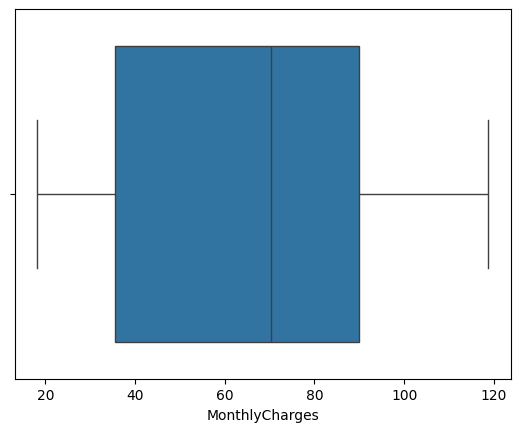

In [ ]:
sns.boxplot(x=df_telco["MonthlyCharges"])
plt.show()

### Interpretasi MonthlyCharges

- Berdasarkan boxplot, nilai MonthlyCharges memiliki rentang sekitar 20 hingga 120.
Median berada di kisaran ±70, yang menunjukkan bahwa separuh pelanggan membayar di bawah nilai tersebut dan separuh lainnya di atasnya.

- Tidak terlihat adanya outlier ekstrem di luar batas whisker, sehingga variasi nilai masih dalam batas wajar dan mencerminkan perbedaan paket layanan pelanggan.

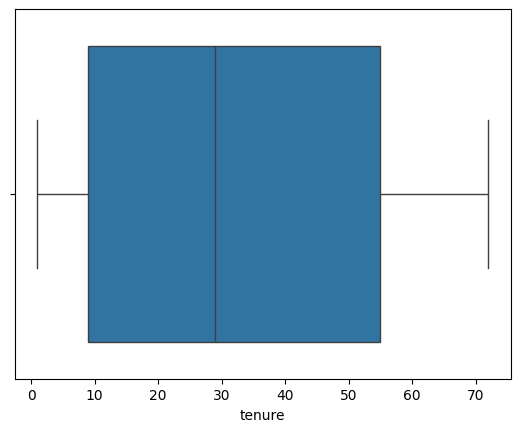

In [ ]:
sns.boxplot(x=df_telco["tenure"])
plt.show()

### Interpretasi Tenure

- Variabel tenure memiliki rentang antara 0 hingga 72 bulan.
Median berada di sekitar pertengahan distribusi, menunjukkan variasi durasi berlangganan pelanggan.

- Tidak ditemukan outlier ekstrem, sehingga nilai rendah maupun tinggi masih mencerminkan kondisi bisnis yang wajar, seperti pelanggan baru dan pelanggan lama.

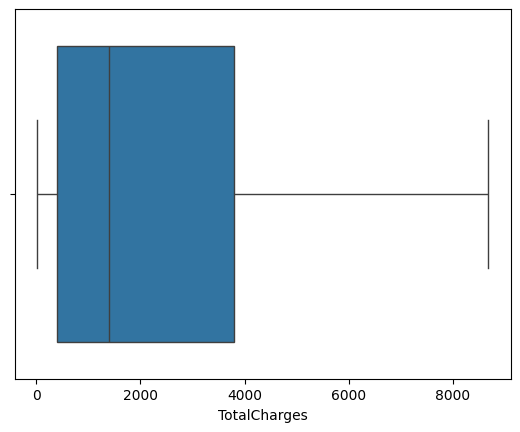

In [ ]:
sns.boxplot(x=df_telco["TotalCharges"])
plt.show()

### Interpretasi TotalCharges

- Nilai TotalCharges menunjukkan rentang yang cukup besar karena merupakan akumulasi biaya bulanan selama masa berlangganan.
Distribusi terlihat menyebar namun masih dalam batas wajar.

- Nilai tinggi tidak dapat dianggap sebagai outlier karena secara logis berkaitan dengan pelanggan yang memiliki tenure panjang dan biaya bulanan tinggi.

## ✅ Ringkasan Proses Data Cleaning
Dataset telah melalui proses pembersihan dan validasi kualitas data.
Tidak ditemukan data duplikat dan missing value telah ditangani.
Distribusi numerik berada dalam rentang yang wajar sehingga dataset siap digunakan untuk analisis lanjutan.